**Imports**

In [233]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import modplot
import os
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats

**Load in the Datasets from the MCA**

In [2]:
# useful directories
base_dir = 'C:\\Users\\vega0\\Documents\\Academics\\MIT Course Materials\\Course 8 Physics\\8.13 Experimental Physics 1\\Fall 2021\\Experiment Sequences\\Relativistic Dynamics'
dir_data = base_dir + '\\Data\\Day 11'

In [3]:
os.chdir(dir_data)

In [4]:
os.listdir()

['100_B-Field.Spe',
 '110_B-Field.Spe',
 '119_B-Field.Spe',
 '70_B-Field.Spe',
 '80_B-Field_10_min.Spe',
 '90_B-Field.Spe']

In [5]:
dirs = sorted(os.listdir())

In [6]:
files = dirs[3:] + dirs[:3]

In [7]:
files

['70_B-Field.Spe',
 '80_B-Field_10_min.Spe',
 '90_B-Field.Spe',
 '100_B-Field.Spe',
 '110_B-Field.Spe',
 '119_B-Field.Spe']

**For each file, create a readable array of data**

In [8]:
# function to get the event counts
def counter(file):
    f = open(file, 'r')
    data = f.readlines()
    
    counts = []
    for line in data[12:2060]:
        newline = line.replace('\n', ' ')
        count = float(newline)
        counts.append(count)
    
    return counts

In [9]:
# list to store the histogram counts
hist70 = []
hist80 = []
hist90 = []
hist100 = []
hist110 = []
hist120 = []

hists = [hist70, hist80, hist90, hist100, hist110, hist120]

In [10]:
# get all of the counts
for hist in hists:
    # get index of histogram in list
    i = hists.index(hist)
    
    # assign the counts to corresponding array
    hist = counter(files[i])
    
    # reassign the new histograms in the list to the filled arrays
    hists[i] = hist

In [11]:
max(counter(files[0]))

27.0

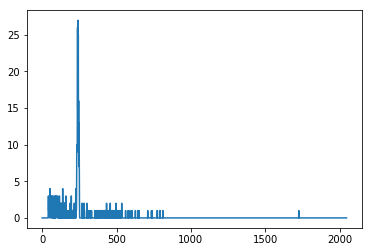

In [12]:
plt.plot(counter(files[0]))

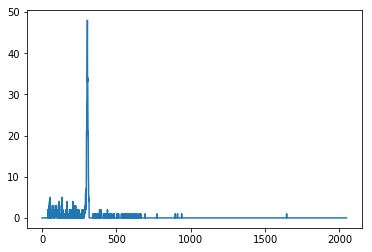

In [13]:
plt.plot(counter(files[1]))

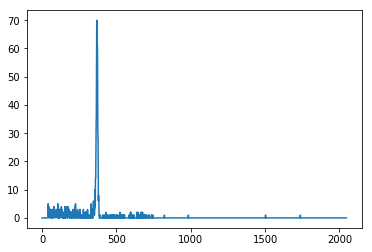

In [14]:
plt.plot(counter(files[2]))

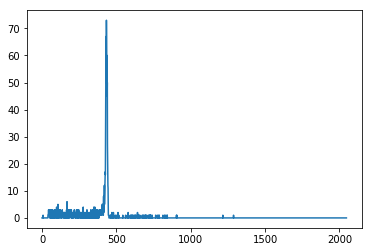

In [15]:
plt.plot(counter(files[3]))

**Plot the Whole Histograms to get a sense for the Shape**

In [16]:
# plotting parameters
save = False
mpl.rcParams['figure.dpi'] = 300
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

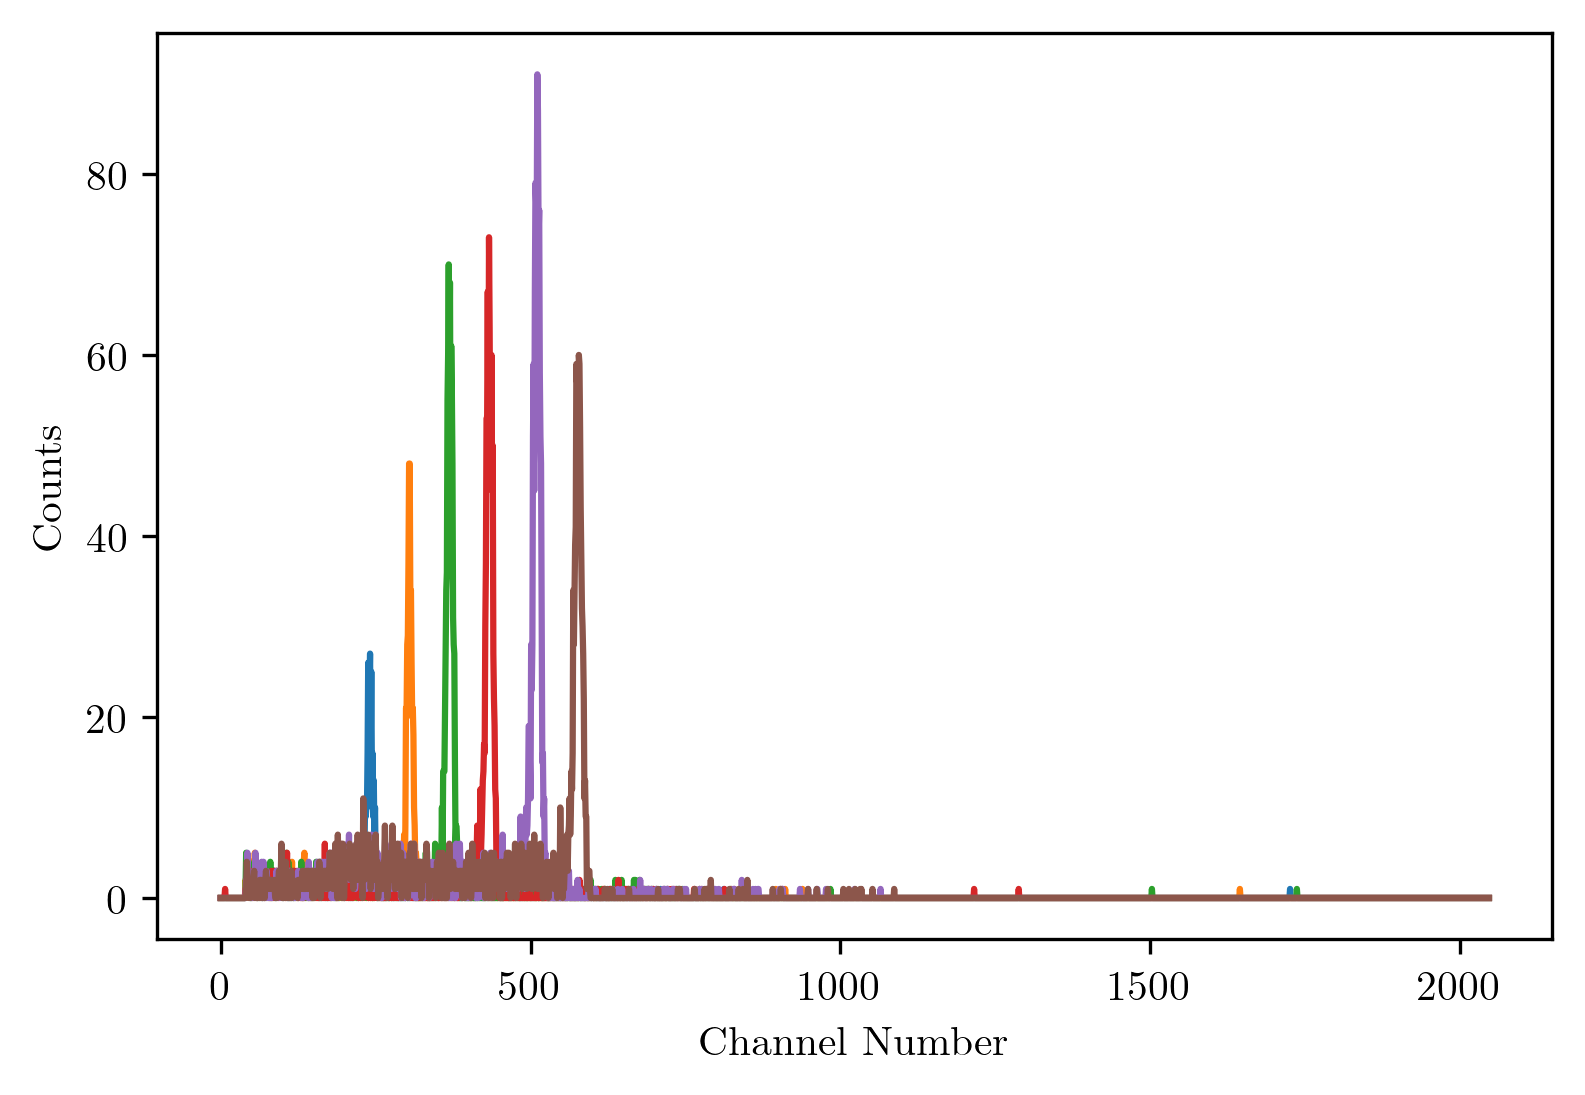

In [22]:
for hist in hists:
    plt.plot(hist)
    plt.ylabel('Counts')
    plt.xlabel('Channel Number')

Callibrate the Channel Numbers to the Energy

In [34]:
# each histogram features 2048 channels (bins) from the MCA
channels = np.linspace(0,2047,2048)

In [44]:
# function based on our regression model to get energy from channel (in KeV)
def ecal(channels):
    energies = 0.6087*np.array(channels) - 0.077
    return energies

In [45]:
ecal(channels)

array([-7.7000000e-02,  5.3170000e-01,  1.1404000e+00, ...,
        1.2447145e+03,  1.2453232e+03,  1.2459319e+03])

In [46]:
len(ecal(channels))

2048

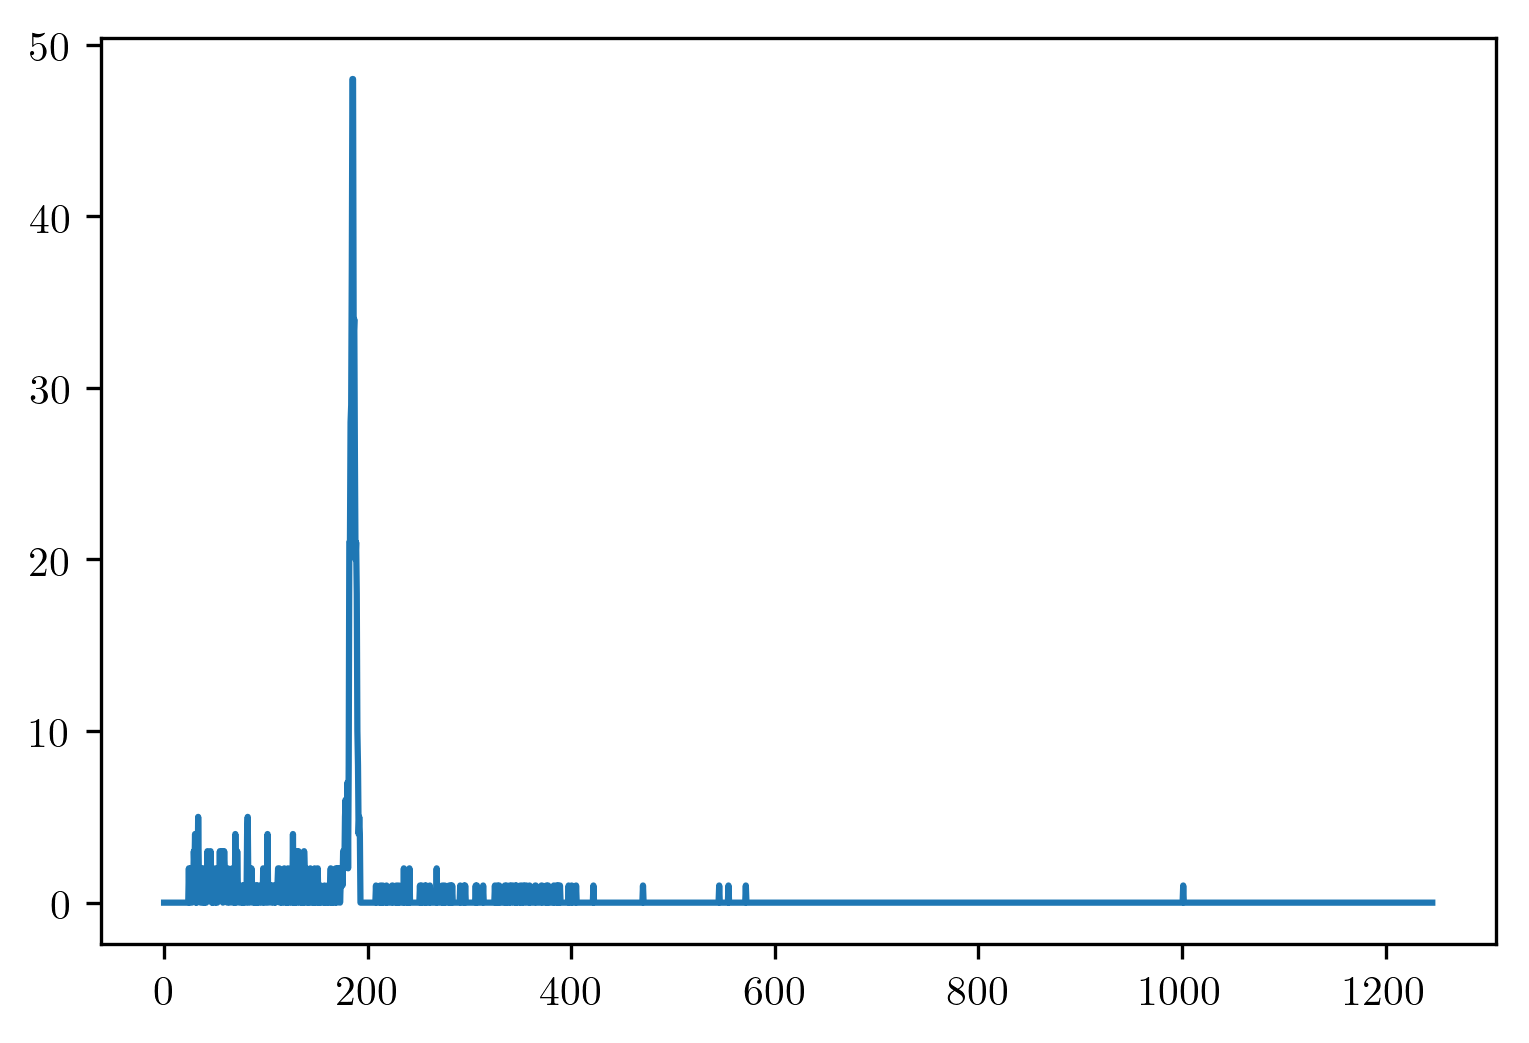

In [47]:
plt.plot(ecal(channels), hists[1])

**Plot Each Histogram Individually in Modplot Format**

In [48]:
# calibrated energies
energies = ecal(channels)

In [49]:
# poisson error bars
def perrs(counts):
    N = np.sum(counts)
    return np.sqrt(counts*(1-counts/N))

In [51]:
hist[0]

0.0

In [67]:
# get rid of zero bins
def delete_zeros(bins,counts):
    zeros = np.where(counts==0) # Find the indices where the frequency data is zero
    mask = np.ones(len(counts),dtype=bool) # create a mask of True values
    mask[zeros[0]] = False # Turn the zero parts of the mask False
    new_counts = counts[mask] # Recreate the bin data without the False parts
    new_bins = bins[mask] # Recreate the frequency data without the False parts
    return new_bins, new_counts

In [85]:
bins70, hist70 = delete_zeros(energies, np.array(hists[0]))
bins80, hist80 = delete_zeros(energies, np.array(hists[1]))
bins90, hist90 = delete_zeros(energies, np.array(hists[2]))
bins100, hist100 = delete_zeros(energies, np.array(hists[3]))
bins110, hist110 = delete_zeros(energies, np.array(hists[4]))
bins120, hist120 = delete_zeros(energies, np.array(hists[5]))

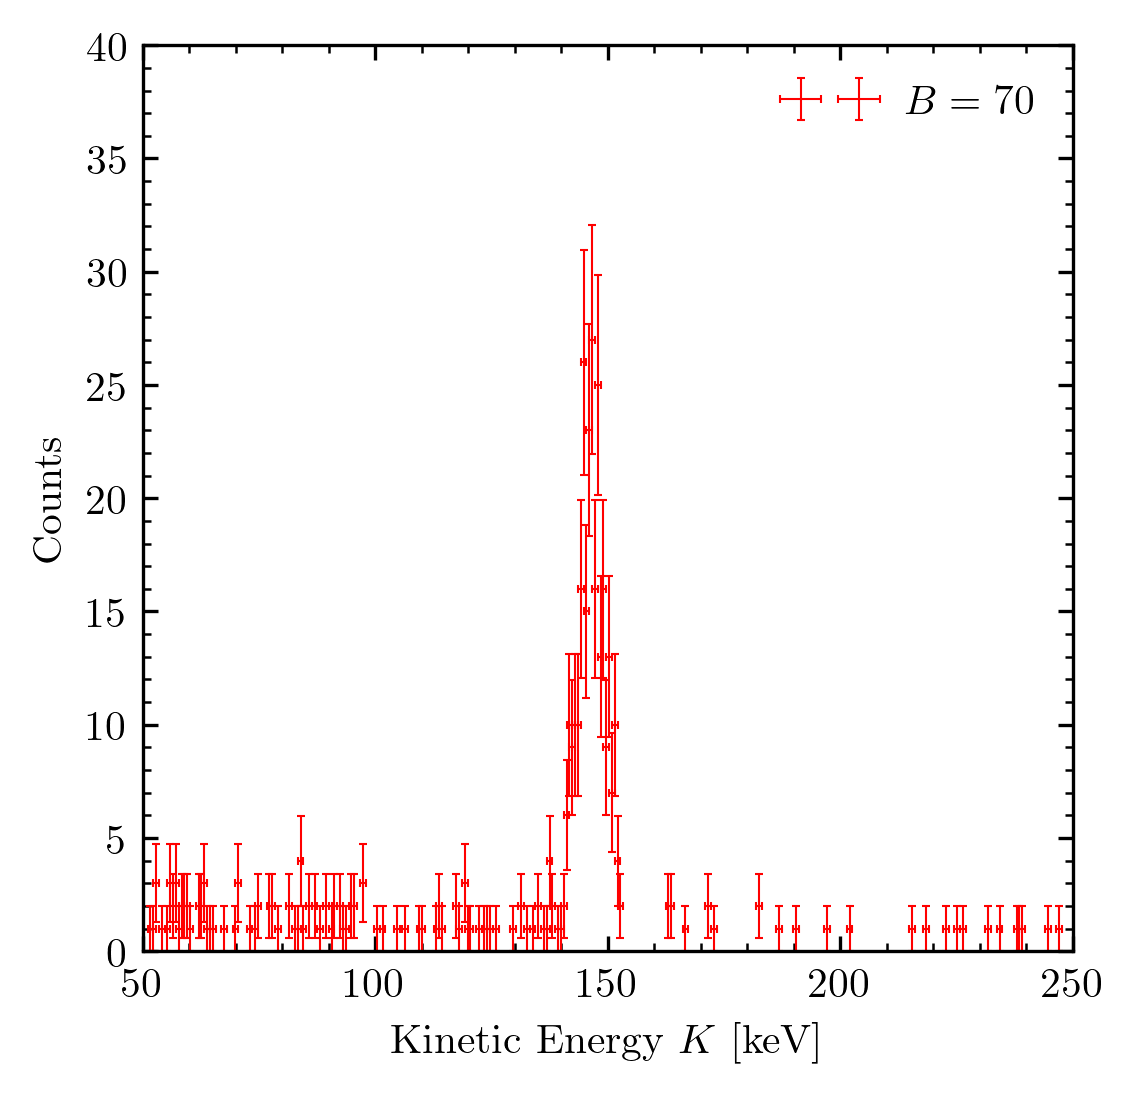

In [89]:
# 70G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(50,250), ylim=(0,40), 
                         xlabel='Kinetic Energy $K$ [keV]', ylabel='Counts')

# data
ax.errorbar(bins70, hist70, xerr=0.6087, yerr=perrs(hist70), label='$B=70$', color='red', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

ax.legend(loc='upper right', numpoints=2, frameon=False)

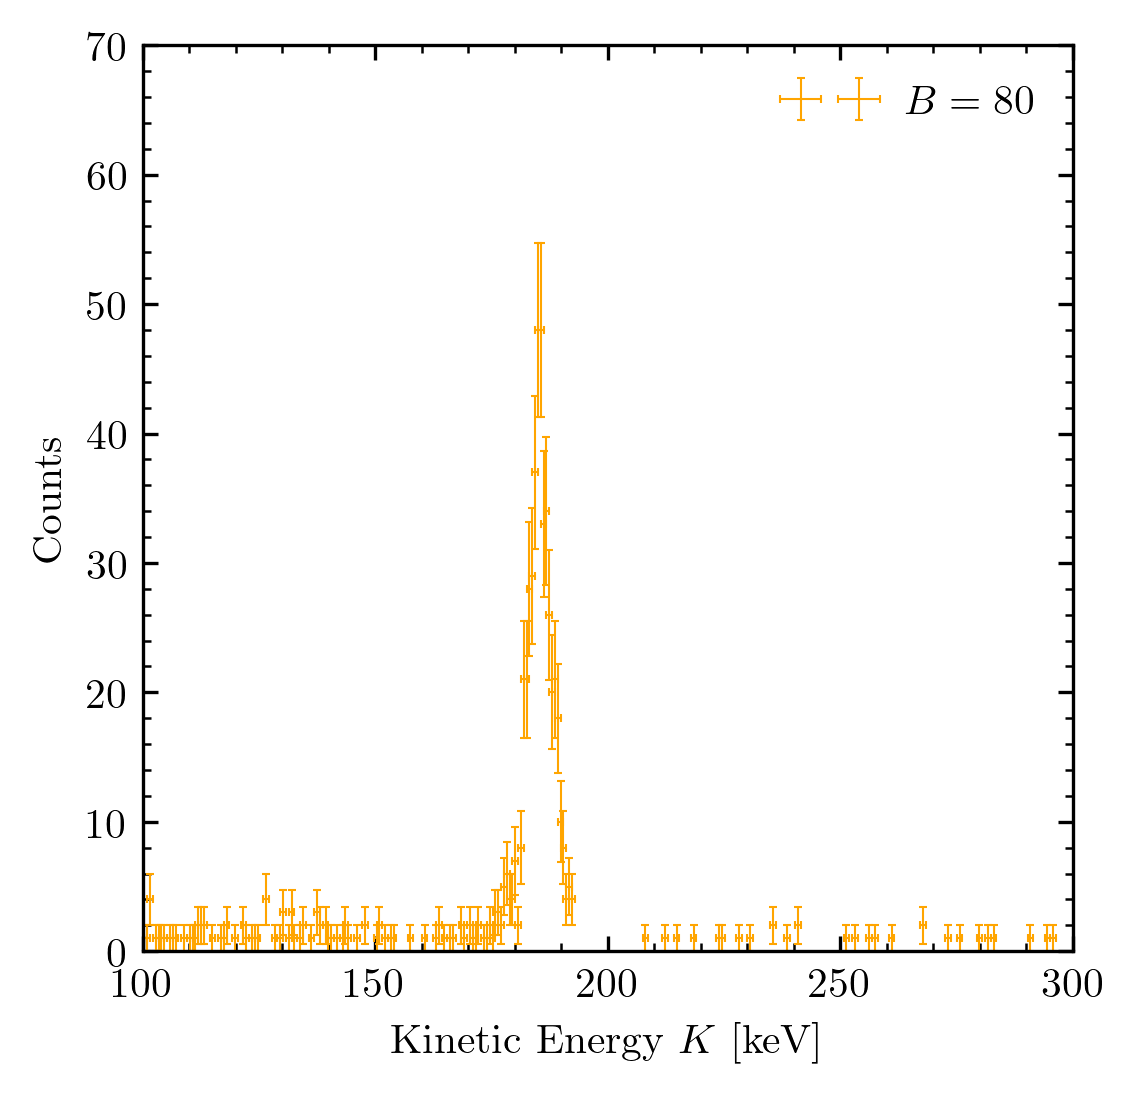

In [93]:
# 80G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(100,300), ylim=(0,70), 
                         xlabel='Kinetic Energy $K$ [keV]', ylabel='Counts')

# data
ax.errorbar(bins80, hist80, xerr=0.6087, yerr=perrs(hist80), label='$B=80$', color='orange', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

ax.legend(loc='upper right', numpoints=2, frameon=False)

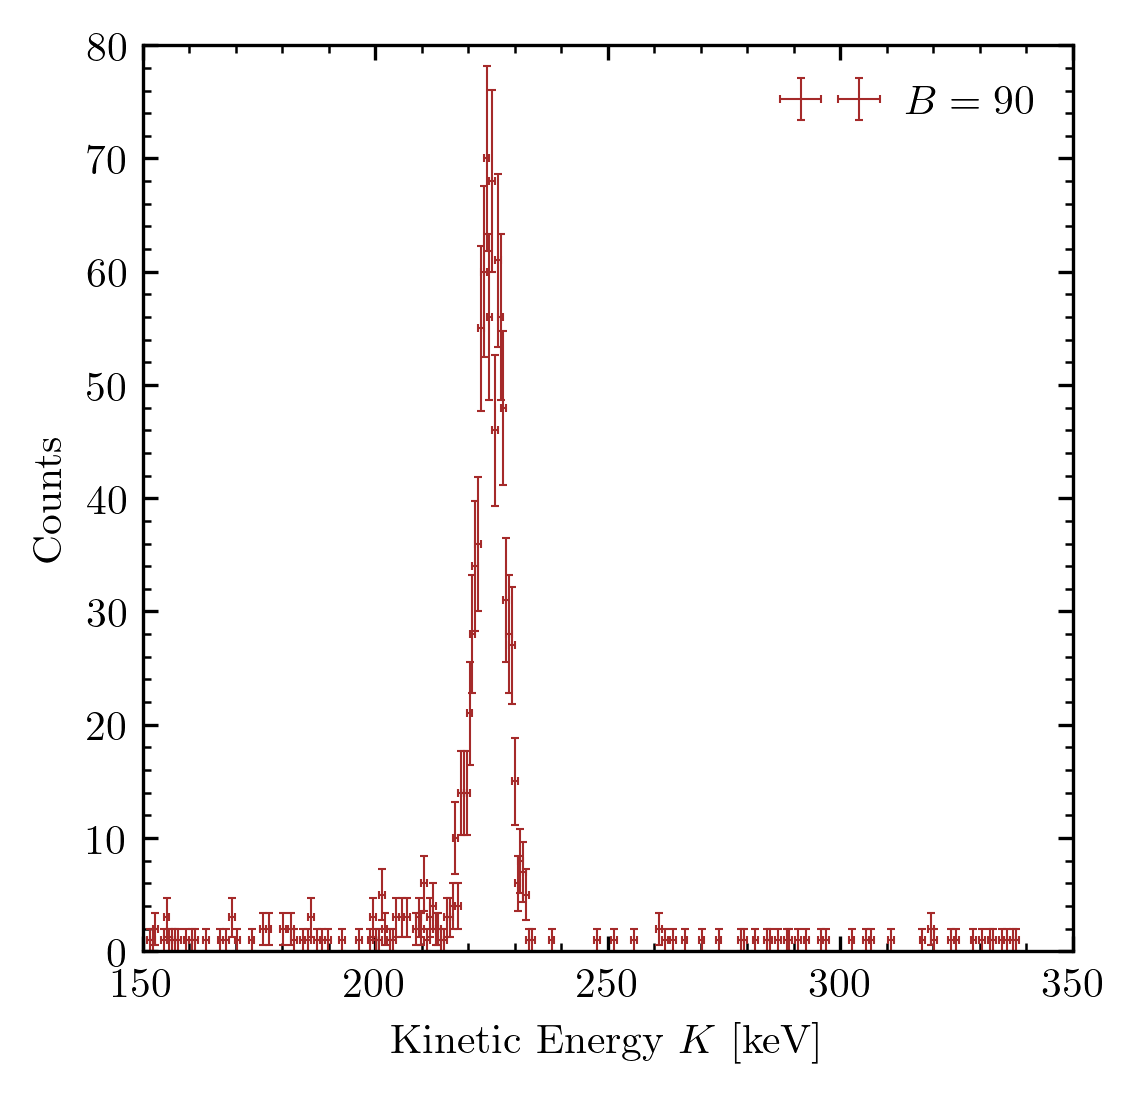

In [98]:
# 90G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(150,350), ylim=(0,80), 
                         xlabel='Kinetic Energy $K$ [keV]', ylabel='Counts')

# data
ax.errorbar(bins90, hist90, xerr=0.6087, yerr=perrs(hist90), label='$B=90$', color='brown', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

ax.legend(loc='upper right', numpoints=2, frameon=False)

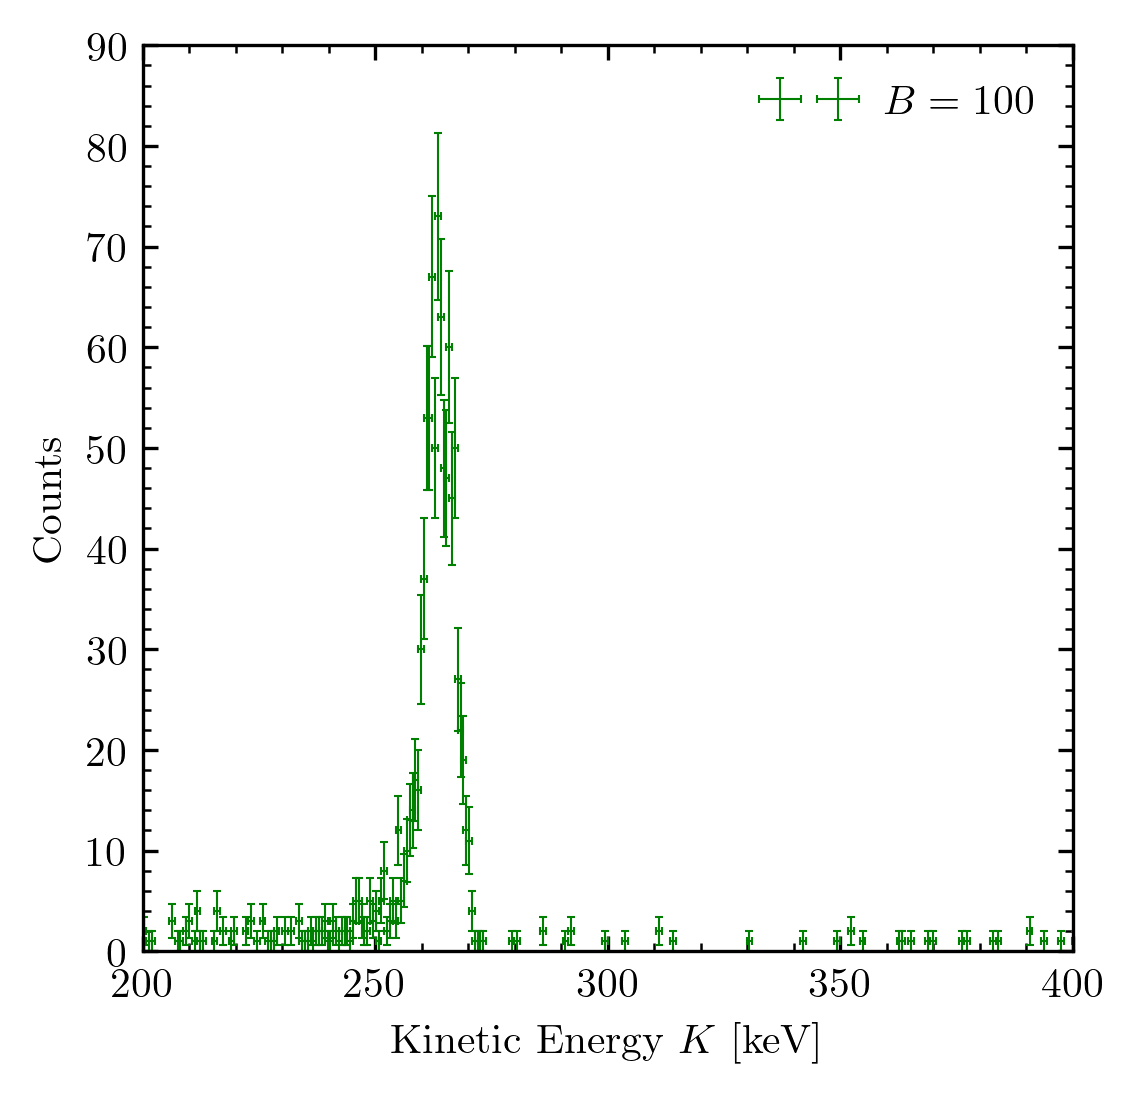

In [100]:
# 100G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(200,400), ylim=(0,90), 
                         xlabel='Kinetic Energy $K$ [keV]', ylabel='Counts')

# data
ax.errorbar(bins100, hist100, xerr=0.6087, yerr=perrs(hist100), label='$B=100$', color='green', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

ax.legend(loc='upper right', numpoints=2, frameon=False)

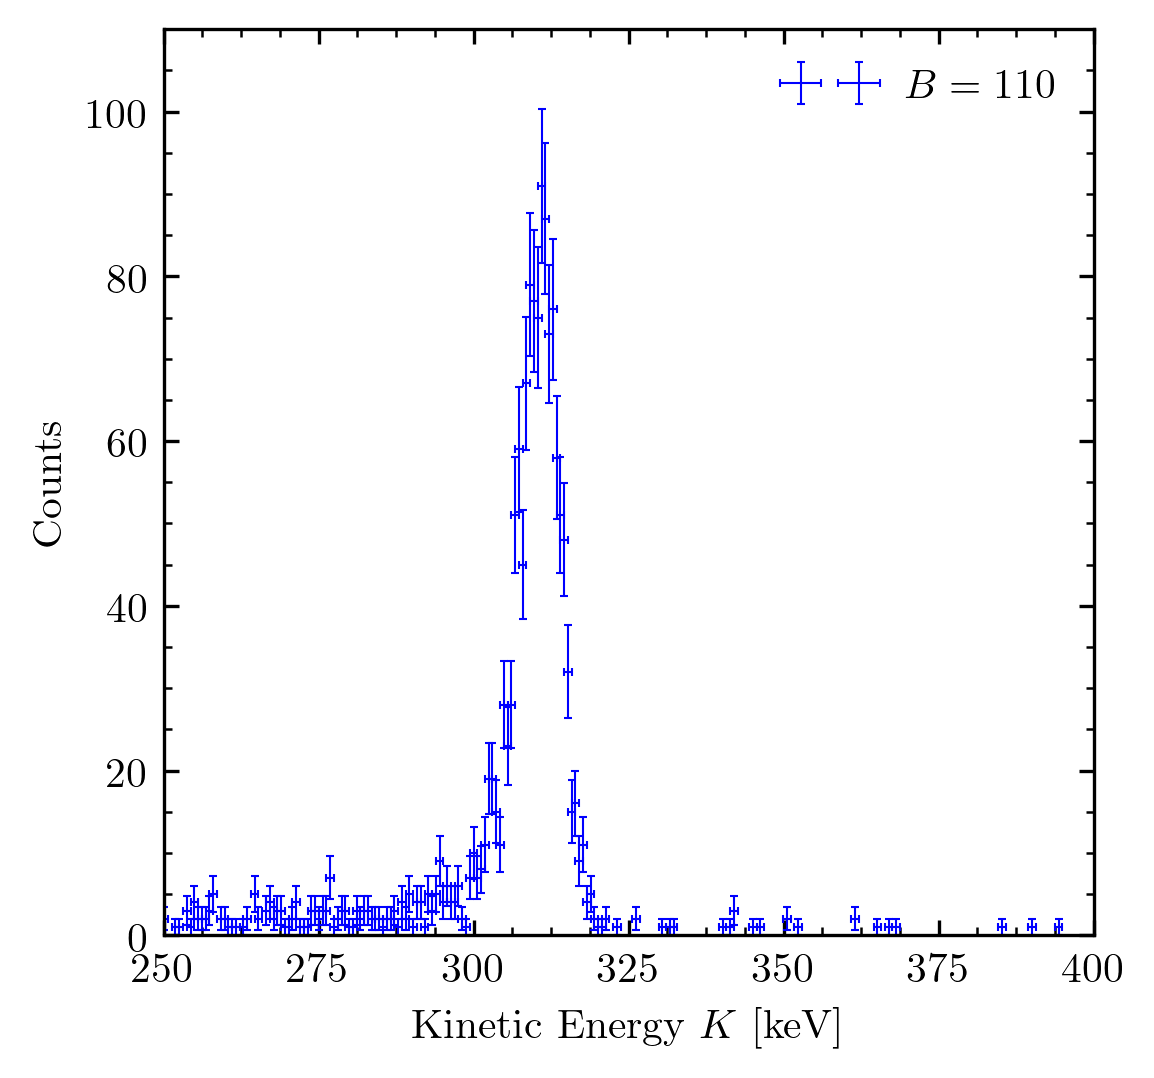

In [106]:
# 110G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(250,400), ylim=(0,110), 
                         xlabel='Kinetic Energy $K$ [keV]', ylabel='Counts')

# data
ax.errorbar(bins110, hist110, xerr=0.6087, yerr=perrs(hist110), label='$B=110$', color='blue', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

ax.legend(loc='upper right', numpoints=2, frameon=False)

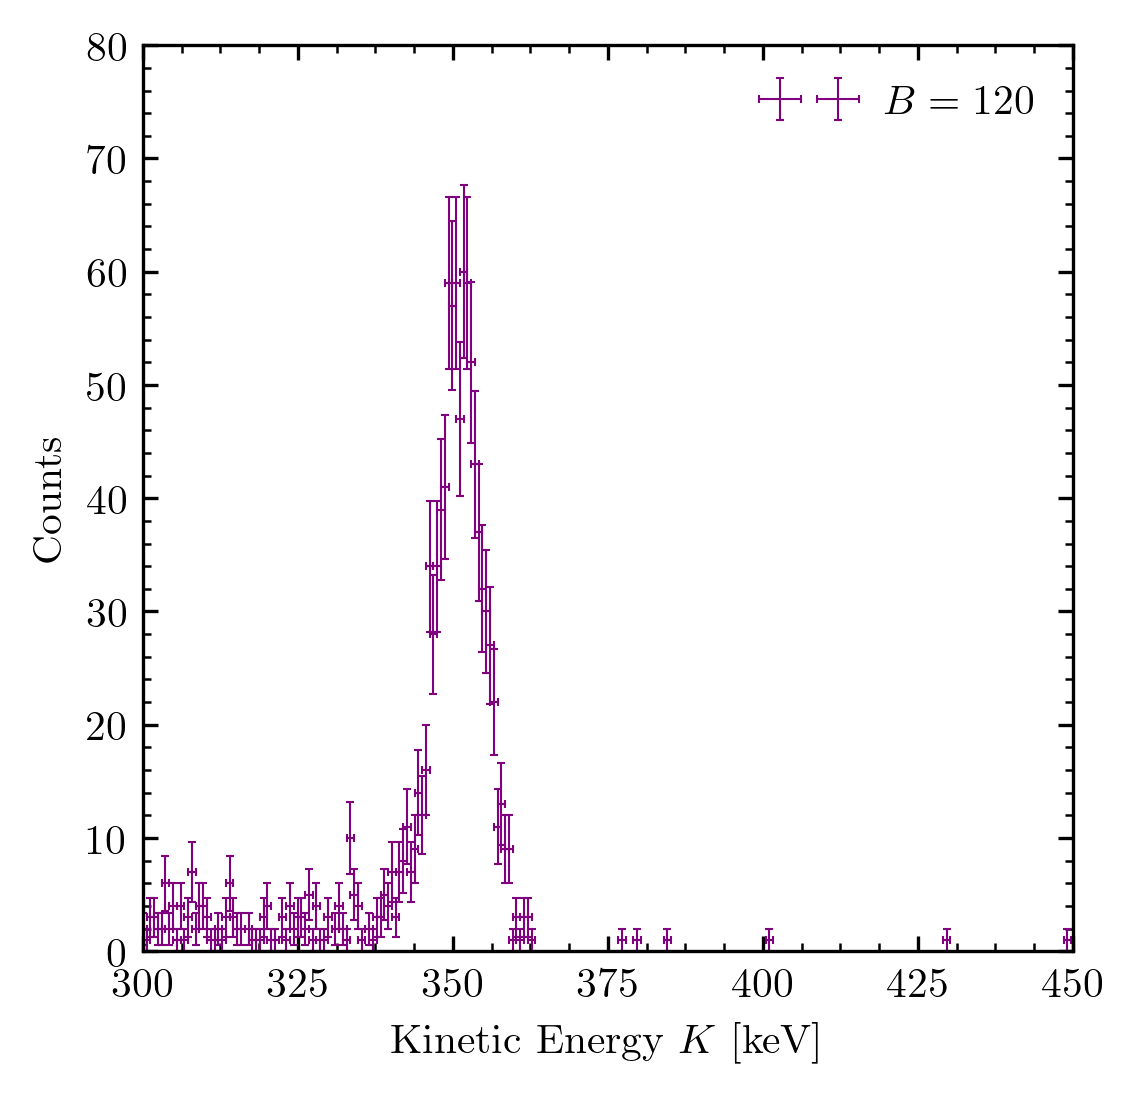

In [119]:
# 120G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(300,450), ylim=(0,80), 
                         xlabel='Kinetic Energy $K$ [keV]', ylabel='Counts')

# data
ax.errorbar(bins120, hist120, xerr=0.6087, yerr=perrs(hist120), label='$B=120$', color='purple', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

ax.legend(loc='upper right', numpoints=2, frameon=False)

**Perform Curve Fits to All of These Histograms**

Define Necessary Fitting Functions

In [114]:
# gaussian function
def gaussian(x,mu,sigma,a):
    return a*np.exp((-(x-mu)**2)/(2*sigma**2))

In [115]:
# fit function
def gaussfit(bins, hist, errs, mug, sigmag, ag):
    popt, pcov = curve_fit(gaussian, bins, hist, sigma=errs, p0 = [mug, sigmag, ag], 
                       absolute_sigma = True)
    return popt, pcov

In [116]:
# chi squared function
def chisq(func,popt,x,y,sig):
    expected_vals = func(x, *popt) # Again, better off using *popt
    return np.sum((y-expected_vals)**2/sig**2)

Apply the Fits and Statistical Tests to Each of the Six Histograms

In [121]:
# fitting to get optimal parameters for each histogram
popt70, pcov70 = gaussfit(bins70, hist70, perrs(hist70), 150, np.std(hist70), 35)
popt80, pcov80 = gaussfit(bins80, hist80, perrs(hist80), 180, np.std(hist80), 55)
popt90, pcov90 = gaussfit(bins90, hist90, perrs(hist90), 225, np.std(hist90), 80)
popt100, pcov100 = gaussfit(bins100, hist100, perrs(hist100), 260, np.std(hist100), 80)
popt110, pcov110 = gaussfit(bins110, hist110, perrs(hist110), 315, np.std(hist110), 100)
popt120, pcov120 = gaussfit(bins120, hist120, perrs(hist120), 350, np.std(hist120), 70)

In [123]:
# get the chisquared values for each of the six fits
chi70 = chisq(gaussian, popt70, bins70, hist70, perrs(hist70))
chi80 = chisq(gaussian, popt80, bins80, hist80, perrs(hist80))
chi90 = chisq(gaussian, popt90, bins90, hist90, perrs(hist90))
chi100 = chisq(gaussian, popt100, bins100, hist100, perrs(hist100))
chi110 = chisq(gaussian, popt110, bins110, hist110, perrs(hist110))
chi120 = chisq(gaussian, popt120, bins120, hist120, perrs(hist120))

In [127]:
chi90

492.45917048353954

In [202]:
popt70 # mu, sigma, A

array([146.5234067 ,   3.0440521 ,  20.73410297])

Show the Fits on Plots

In [138]:
# x axis points to plot fit function against for smoothness
x = np.linspace(0,500,num=1000000,endpoint=True)

In [210]:
np.sqrt(np.diag(pcov70))

array([0.20352405, 0.16841381, 1.62428354])

In [235]:
pr70 = 1 - stats.chi2.cdf(chi70, len(bins70)-3)

In [236]:
pr70

0.0004556835090402389

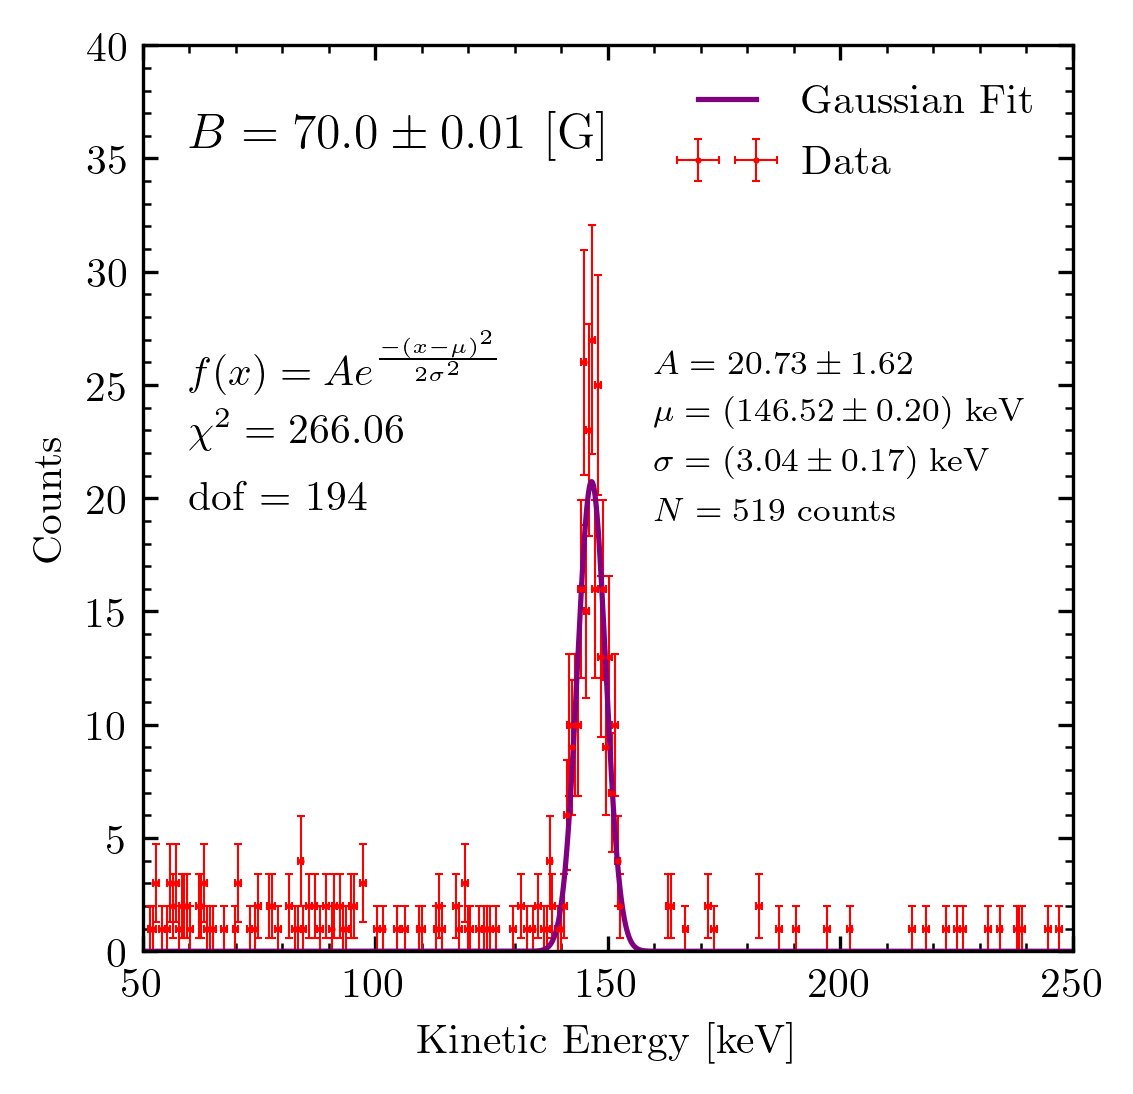

In [281]:
# 70G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(50,250), ylim=(0,40), 
                         xlabel='Kinetic Energy [keV]', ylabel='Counts')

# data
ax.errorbar(bins70, hist70, xerr=0.6087, yerr=perrs(hist70), label='Data', color='red', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none', marker='.', ms=1)
# fit 
ax.plot(x, gaussian(x, *popt70), color = 'purple', label = 'Gaussian Fit', lw=1.25)

modplot.stamp(0.05, 0.65, ax=ax, delts_y=0.055, textops_update={'fontsize':10}, 
              line_0=r'$f(x)=A e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$',
              line_1='$\chi^{2}=266.06$', 
              line_2='dof = 194')

modplot.stamp(0.55, 0.65, ax=ax, delta_y=0.055,textops_update = {'fontsize':8},
              line_0='$A = 20.73 \pm 1.62$',
              line_1='$\mu = (146.52 \pm 0.20)$ keV', 
              line_2='$\sigma = (3.04 \pm 0.17)$ keV',
              line_3='$N = 519$ counts')

modplot.stamp(0.05,0.90, ax=ax, delta_y=0.055,textops_update = {'fontsize':12},
              line_0='$B = 70.0 \pm 0.01$ [G]')

ax.legend(loc='upper right', numpoints=2, frameon=False)

In [274]:
len(bins70)

197

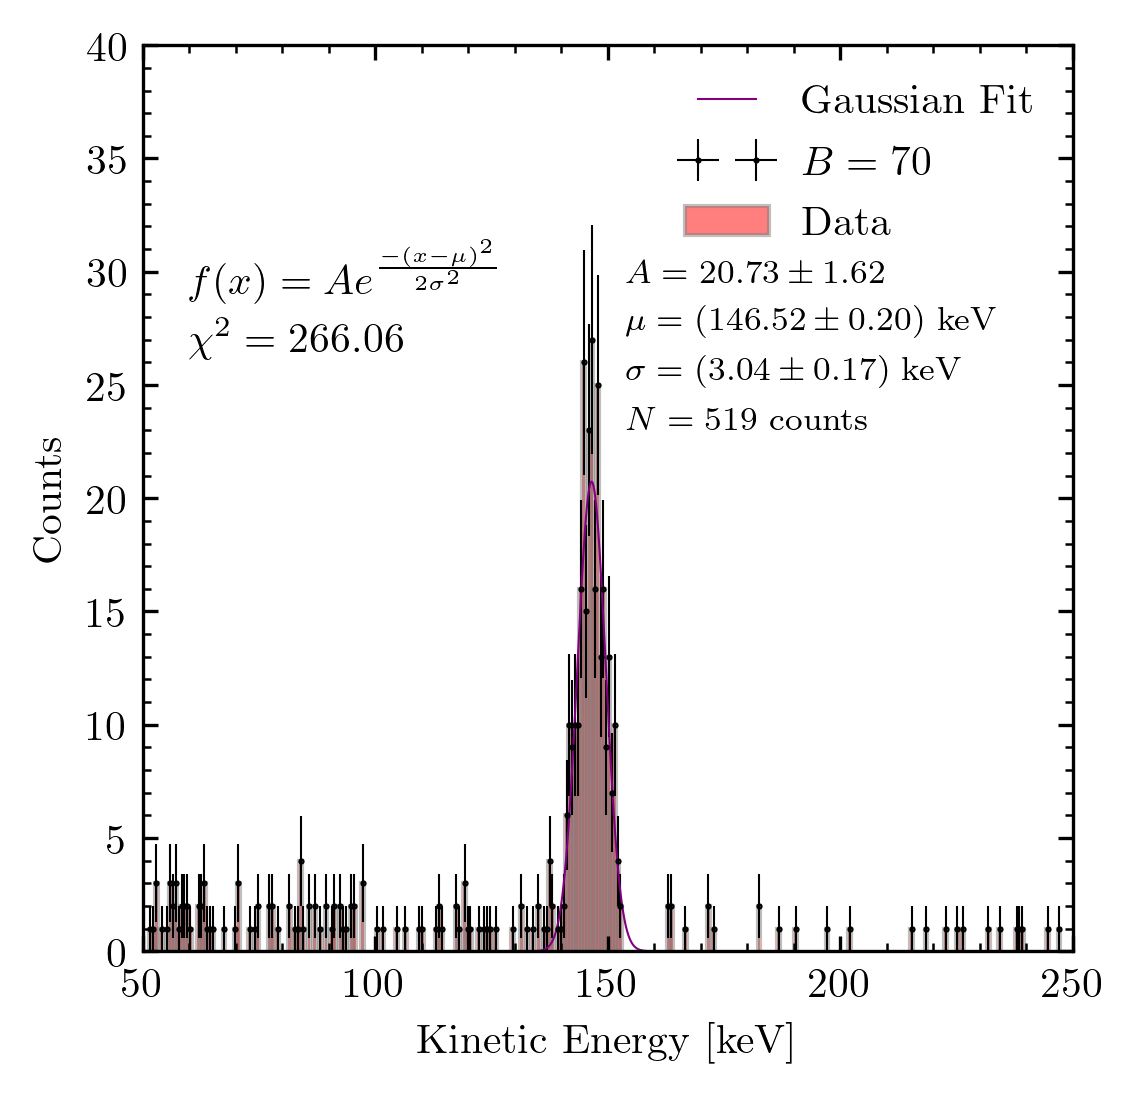

In [264]:
# 70G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(50,250), ylim=(0,40), 
                         xlabel='Kinetic Energy [keV]', ylabel='Counts')

# data
ax.errorbar(bins70, hist70, xerr=0, yerr=perrs(hist70), label='$B=70$', color='black', 
            capthick=0.5, elinewidth=0.5, capsize=0, ls='none', marker='.', ms=1)
# fit 
ax.plot(x, gaussian(x, *popt70), color = 'purple', label = 'Gaussian Fit', lw=0.5)

# bars
ax.bar(bins70, hist70, width=bins70[1]-bins70[0], edgecolor='gray', 
       label='Data', linewidth=1.0, fill=1, color='red', alpha=0.5)

modplot.stamp(0.05, 0.75, ax=ax, delts_y=0.055, textops_update={'fontsize':10}, 
              line_0=r'$f(x)=A e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$',
              line_1='$\chi^{2}=266.06$')

modplot.stamp(0.52, 0.75, ax=ax, delta_y=0.055,textops_update = {'fontsize':8},
              line_0='$A = 20.73 \pm 1.62$',
              line_1='$\mu = (146.52 \pm 0.20)$ keV', 
              line_2='$\sigma = (3.04 \pm 0.17)$ keV',
              line_3='$N = 519$ counts')

ax.legend(loc='upper right', numpoints=2, frameon=False)

In [164]:
popt70

array([146.5234067 ,   3.0440521 ,  20.73410297])

In [165]:
np.sum(hist70)

519.0

In [213]:
np.sqrt(np.diag(pcov80))

array([0.12879084, 0.10520751, 2.41842317])

In [214]:
chi80

341.5619378845338

In [237]:
pr80 = 1 - stats.chi2.cdf(chi80, len(bins80)-3)

In [238]:
pr80

1.4599413223459479e-05

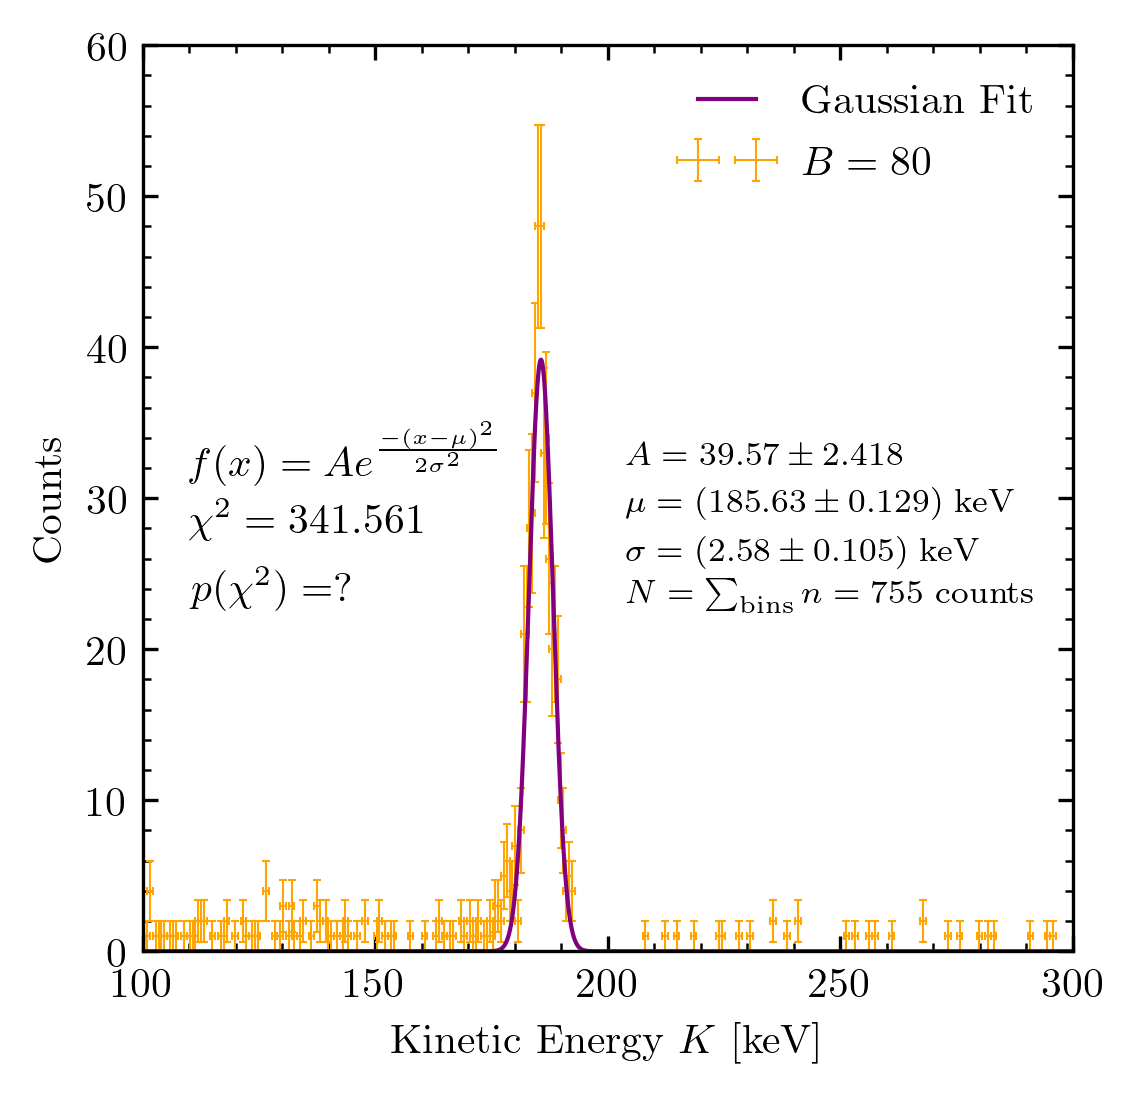

In [215]:
# 80G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(100,300), ylim=(0,60), 
                         xlabel='Kinetic Energy $K$ [keV]', ylabel='Counts')

# data
ax.errorbar(bins80, hist80, xerr=0.6087, yerr=perrs(hist80), label='$B=80$', color='orange', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

# fit 
ax.plot(x, gaussian(x, *popt80), color = 'purple', label = 'Gaussian Fit', lw=1.0)

modplot.stamp(0.05, 0.55, ax=ax, delts_y=0.055, textops_update={'fontsize':10}, 
              line_0=r'$f(x)=A e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$',
              line_1='$\chi^{2}=341.561$',
              line_2='$p(\chi^{2})=?$')

modplot.stamp(0.52, 0.55, ax=ax, delta_y=0.055,textops_update = {'fontsize':8},
              line_0='$A = 39.57 \pm 2.418$',
              line_1='$\mu = (185.63 \pm 0.129)$ keV', 
              line_2='$\sigma = (2.58 \pm 0.105)$ keV',
              line_3='$N=\sum_{\mathrm{bins}}n = 755$ counts')

ax.legend(loc='upper right', numpoints=2, frameon=False)

In [167]:
popt80

array([185.63670816,   2.58466974,  39.17814247])

In [168]:
np.sum(hist80)

755.0

In [217]:
np.sqrt(np.diag(pcov90))

array([0.11229858, 0.086202  , 2.67301271])

In [218]:
chi90

492.45917048353954

In [239]:
pr90 = 1 - stats.chi2.cdf(chi90, len(bins90)-3)

In [240]:
pr90

7.37559679997446e-10

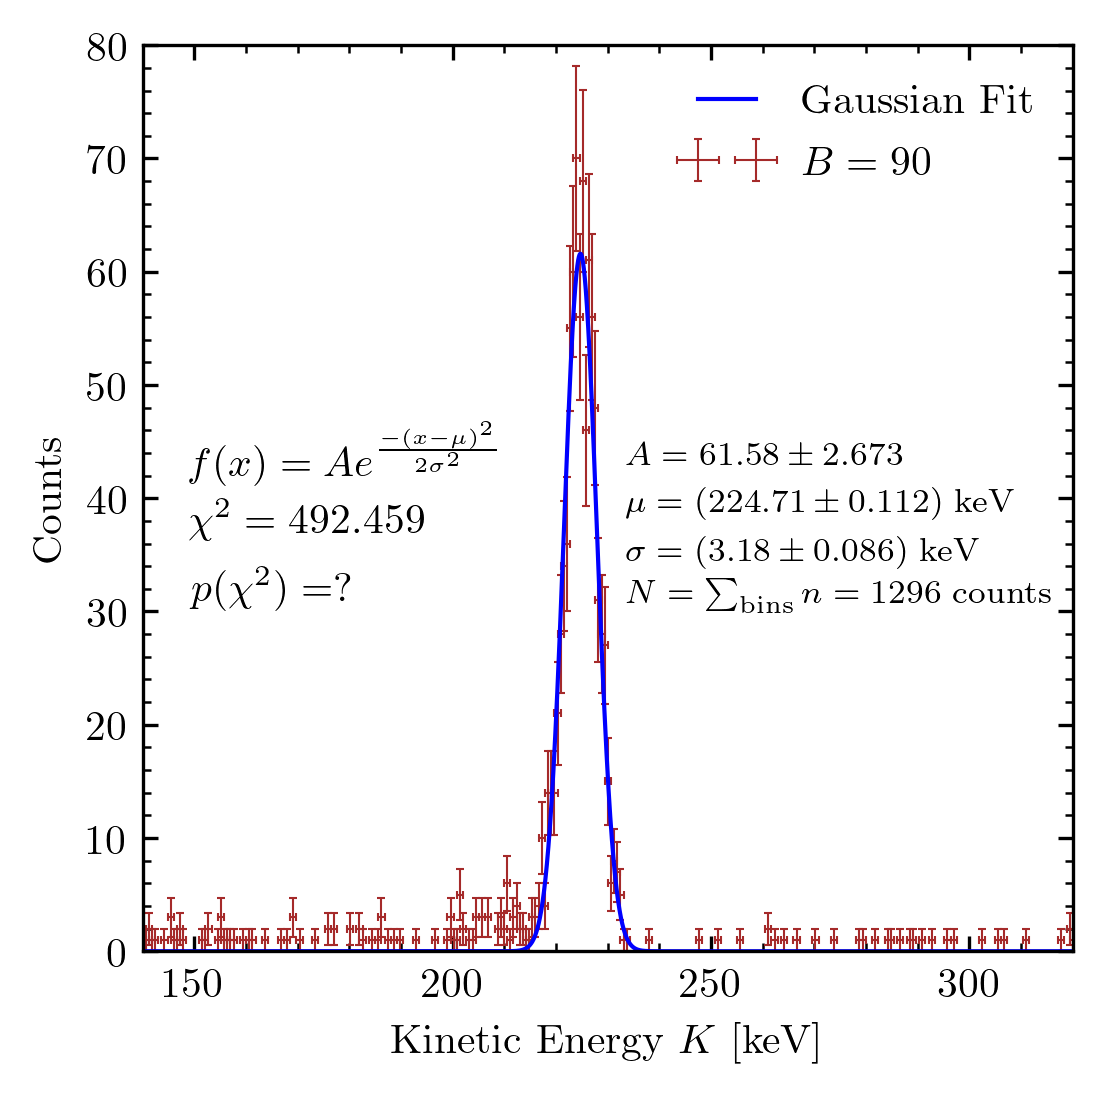

In [219]:
# 90G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(140,320), ylim=(0,80), 
                         xlabel='Kinetic Energy $K$ [keV]', ylabel='Counts')

# data
ax.errorbar(bins90, hist90, xerr=0.6087, yerr=perrs(hist90), label='$B=90$', color='brown', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

# fit 
ax.plot(x, gaussian(x, *popt90), color = 'blue', label = 'Gaussian Fit', lw=1.0)

modplot.stamp(0.05, 0.55, ax=ax, delts_y=0.055, textops_update={'fontsize':10}, 
              line_0=r'$f(x)=A e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$',
              line_1='$\chi^{2}=492.459$',
              line_2='$p(\chi^{2})=?$')

modplot.stamp(0.52, 0.55, ax=ax, delta_y=0.055,textops_update = {'fontsize':8},
              line_0='$A = 61.58 \pm 2.673$',
              line_1='$\mu = (224.71 \pm 0.112)$ keV', 
              line_2='$\sigma = (3.18 \pm 0.086)$ keV',
              line_3='$N=\sum_{\mathrm{bins}}n = 1296$ counts')

ax.legend(loc='upper right', numpoints=2, frameon=False)

In [171]:
popt90

array([224.71014559,   3.18248704,  61.58970113])

In [172]:
np.sum(hist90)

1296.0

In [220]:
np.sqrt(np.diag(pcov100))

array([0.11355099, 0.0834926 , 2.63705805])

In [222]:
chi100

551.7274212459872

In [241]:
pr100 = 1 - stats.chi2.cdf(chi100, len(bins100)-3)

In [242]:
pr100

2.1760371282653068e-13

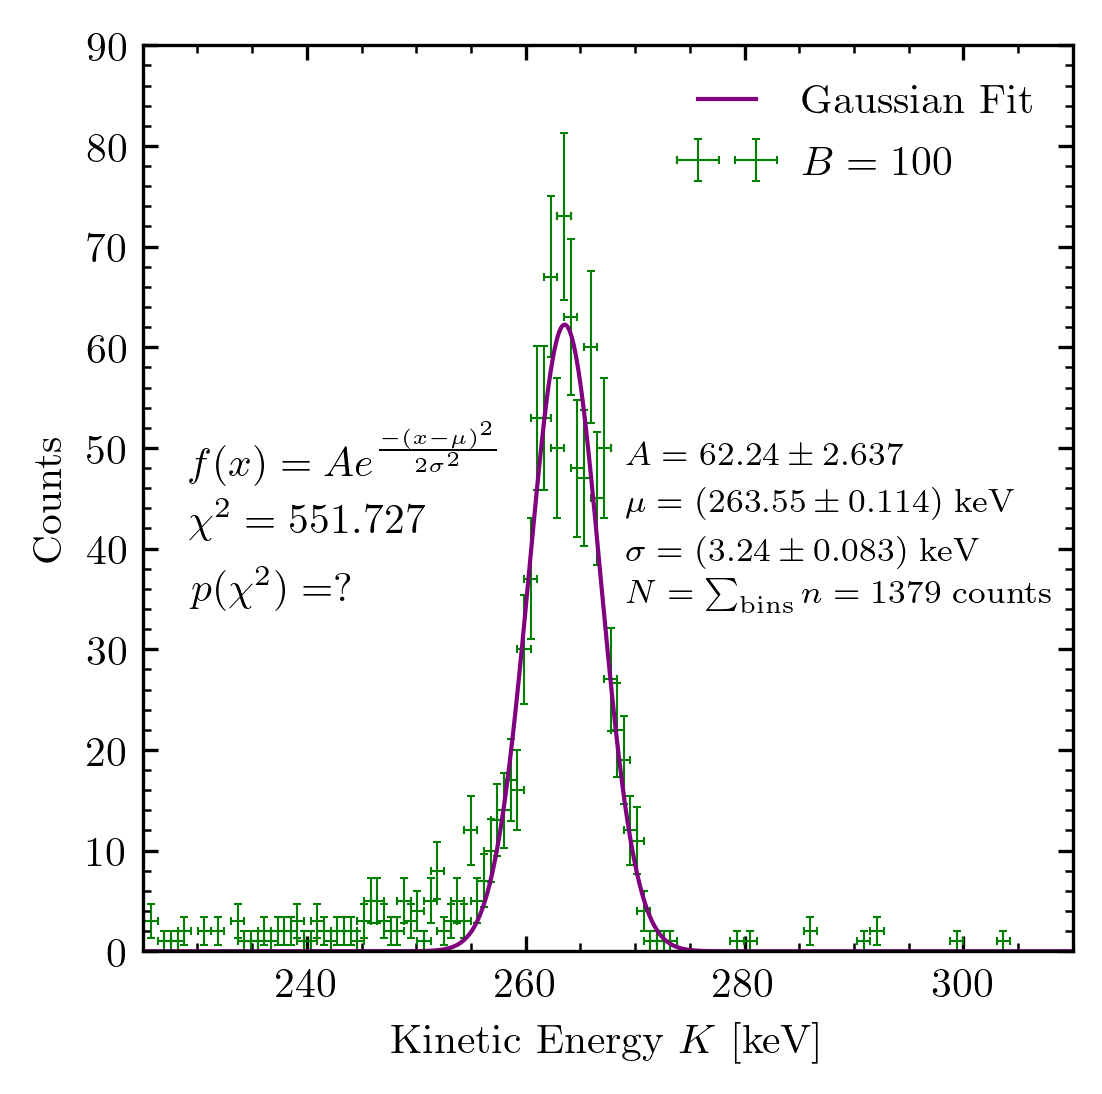

In [223]:
# 100G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(225,310), ylim=(0,90), 
                         xlabel='Kinetic Energy $K$ [keV]', ylabel='Counts')

# data
ax.errorbar(bins100, hist100, xerr=0.6087, yerr=perrs(hist100), label='$B=100$', color='green', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

# fit 
ax.plot(x, gaussian(x, *popt100), color = 'purple', label = 'Gaussian Fit', lw=1.0)

modplot.stamp(0.05, 0.55, ax=ax, delts_y=0.055, textops_update={'fontsize':10}, 
              line_0=r'$f(x)=A e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$',
              line_1='$\chi^{2}=551.727$',
              line_2='$p(\chi^{2})=?$')

modplot.stamp(0.52, 0.55, ax=ax, delta_y=0.055,textops_update = {'fontsize':8},
              line_0='$A = 62.24 \pm 2.637$',
              line_1='$\mu = (263.55 \pm 0.114)$ keV', 
              line_2='$\sigma = (3.24 \pm 0.083)$ keV',
              line_3='$N=\sum_{\mathrm{bins}}n = 1379$ counts')

ax.legend(loc='upper right', numpoints=2, frameon=False)

In [176]:
popt100

array([263.55650762,   3.24089474,  62.24415894])

In [177]:
np.sum(hist100)

1379.0

In [224]:
np.sqrt(np.diag(pcov110))

array([0.10466262, 0.08157503, 2.94686963])

In [225]:
chi110

1136.1730962376123

In [243]:
pr110 = 1 - stats.chi2.cdf(chi110, len(bins110)-3)

In [244]:
pr110

0.0

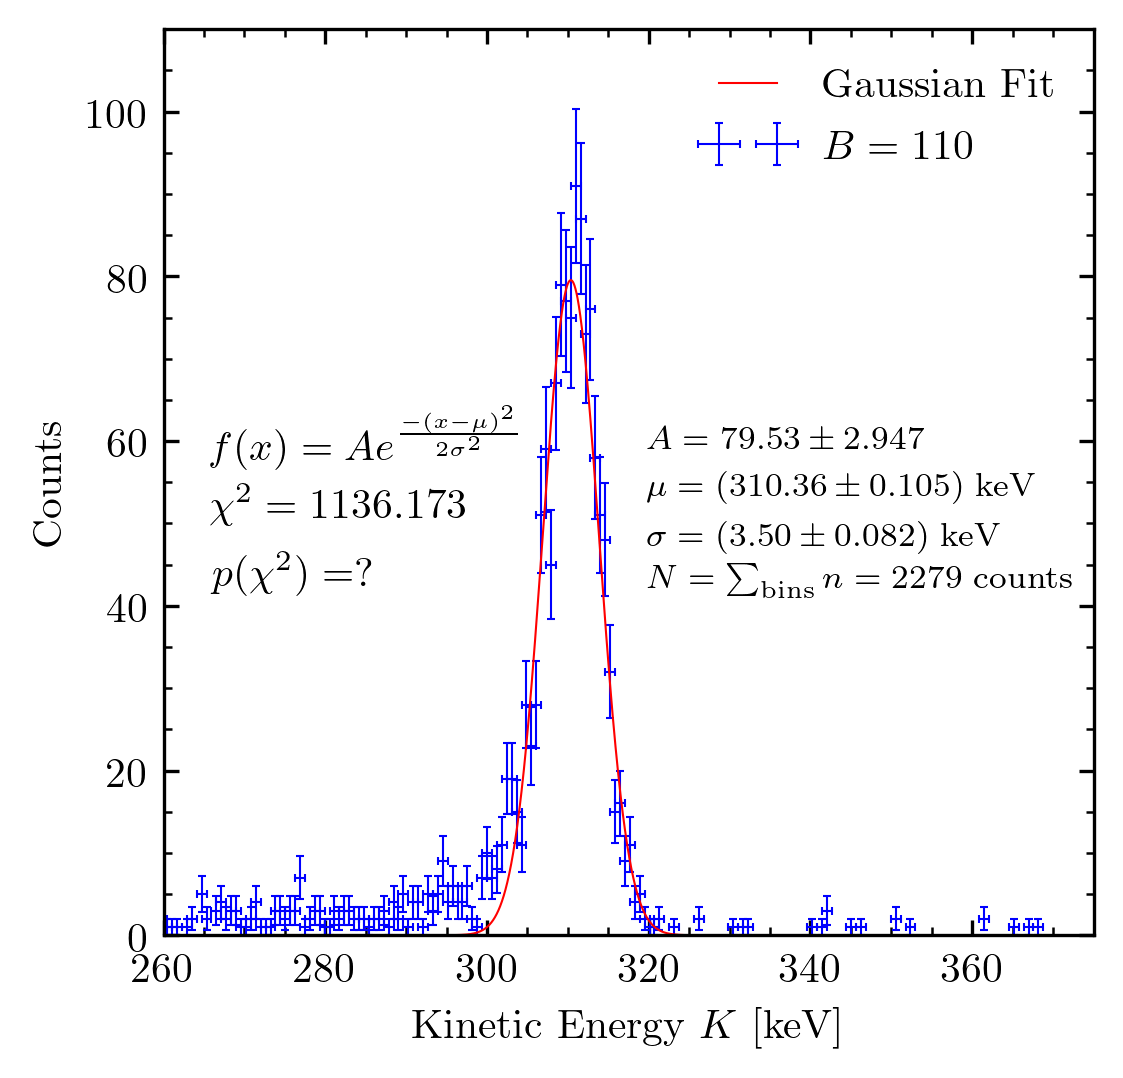

In [226]:
# 110G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(260,375), ylim=(0,110), 
                         xlabel='Kinetic Energy $K$ [keV]', ylabel='Counts')

# data
ax.errorbar(bins110, hist110, xerr=0.6087, yerr=perrs(hist110), label='$B=110$', color='blue', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

# fit 
ax.plot(x, gaussian(x, *popt110), color = 'red', label = 'Gaussian Fit', lw=0.5)

modplot.stamp(0.05, 0.55, ax=ax, delts_y=0.055, textops_update={'fontsize':10}, 
              line_0=r'$f(x)=A e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$',
              line_1='$\chi^{2}=1136.173$',
              line_2='$p(\chi^{2})=?$')

modplot.stamp(0.52, 0.55, ax=ax, delta_y=0.055,textops_update = {'fontsize':8},
              line_0='$A = 79.53 \pm 2.947$',
              line_1='$\mu = (310.36 \pm 0.105)$ keV', 
              line_2='$\sigma = (3.50 \pm 0.082)$ keV',
              line_3='$N=\sum_{\mathrm{bins}}n = 2279$ counts')

ax.legend(loc='upper right', numpoints=2, frameon=False)

In [184]:
popt110

array([310.36715834,   3.50127337,  79.53770186])

In [185]:
np.sum(hist110)

2279.0

In [227]:
np.sqrt(np.diag(pcov120))

array([0.13038607, 0.0998171 , 2.34751624])

In [228]:
chi120

1334.9017913826174

In [245]:
pr120 = 1 - stats.chi2.cdf(chi120, len(bins120)-3)

In [246]:
pr120

0.0

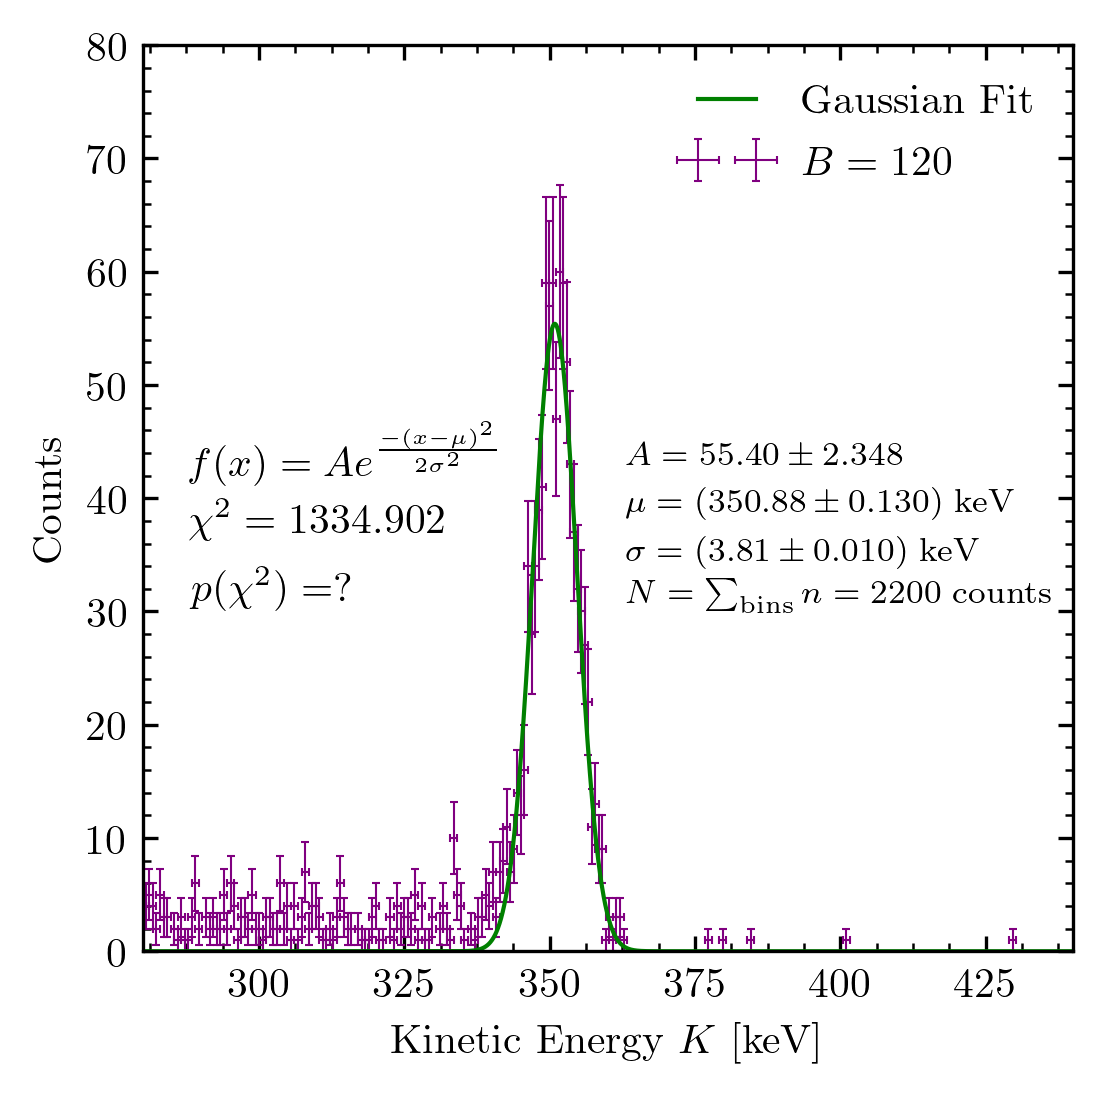

In [229]:
# 120G B field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(280,440), ylim=(0,80), 
                         xlabel='Kinetic Energy $K$ [keV]', ylabel='Counts')

# data
ax.errorbar(bins120, hist120, xerr=0.6087, yerr=perrs(hist120), label='$B=120$', color='purple', 
            capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

# fit 
ax.plot(x, gaussian(x, *popt120), color = 'green', label = 'Gaussian Fit', lw=1.0)

modplot.stamp(0.05, 0.55, ax=ax, delts_y=0.055, textops_update={'fontsize':10}, 
              line_0=r'$f(x)=A e^{\frac{-(x-\mu)^{2}}{2\sigma^{2}}}$',
              line_1='$\chi^{2}=1334.902$',
              line_2='$p(\chi^{2})=?$')

modplot.stamp(0.52, 0.55, ax=ax, delta_y=0.055,textops_update = {'fontsize':8},
              line_0='$A = 55.40 \pm 2.348$',
              line_1='$\mu = (350.88 \pm 0.130)$ keV', 
              line_2='$\sigma = (3.81 \pm 0.010)$ keV',
              line_3='$N=\sum_{\mathrm{bins}}n = 2200$ counts')

ax.legend(loc='upper right', numpoints=2, frameon=False)

In [187]:
popt120

array([350.88735781,   3.80696682,  55.40401369])

In [188]:
np.sum(hist120)

2200.0